### Importing Required Libraries

In [17]:
import pandas as pd
import seaborn as sns

### Importing data

In [3]:
train = pd.read_csv('Train_data.csv')
test = pd.read_csv('Test_data.csv')
sub = pd.read_csv('Sample_submission (1).csv')

### Making Prediction File

In [5]:
def download_preds(preds_test, file_name = 'sub.csv'):

     df = pd.DataFrame()
     ## 1. Setting the target column with our obtained predictions
     df['prediction'] = preds_test
     ## 2. Saving our predictions to a csv file
     df.to_csv(file_name, index = False)


###  Performing EDA

In [4]:
train.head(5)

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,Target
0,59.0,12.8,3.4,1.3,2.6,51.0,0.2,0.3,50.0,0.7,0.8,78.0,1.1,2.3,3.3,0.5,0.3,0.4,0.5,1
1,31.0,10.7,3.4,1.2,3.3,35.3,0.5,2.1,25.8,0.5,0.9,55.2,0.3,1.1,1.4,0.4,0.3,0.1,0.2,0
2,48.0,9.3,4.5,1.7,3.4,49.7,0.0,0.1,0.0,1.2,1.9,61.5,0.4,0.8,1.2,0.8,0.5,0.4,1.0,0
3,80.0,27.7,11.2,3.5,9.4,37.4,1.3,4.1,32.9,2.8,3.3,85.0,0.8,1.6,2.4,3.9,1.3,0.1,2.2,1
4,58.0,18.4,5.8,1.9,5.3,36.7,0.0,0.1,25.0,1.9,3.1,61.7,0.5,0.7,1.2,1.9,1.1,0.2,1.7,0


In [12]:
train.tail(5)

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,Target
1096,49.0,8.3,4.5,1.8,3.9,46.6,0.0,0.1,0.0,0.8,1.2,70.2,0.6,0.7,1.3,0.5,0.3,0.3,0.6,1
1097,35.0,5.5,1.5,0.5,1.4,36.0,0.4,1.1,33.3,0.1,0.1,100.0,0.1,0.6,0.7,0.2,0.1,0.0,0.1,1
1098,65.0,13.2,5.0,2.0,5.0,41.3,0.1,0.3,35.0,0.8,1.0,76.9,0.6,1.0,1.6,1.1,0.7,0.3,0.8,0
1099,55.0,14.9,4.1,1.7,4.1,41.7,0.1,0.1,37.5,0.6,0.8,76.1,0.5,1.0,1.5,1.5,0.7,0.2,0.8,0
1100,55.0,25.3,14.0,5.2,11.3,46.3,0.1,0.5,18.5,3.4,3.8,89.6,0.8,1.3,2.1,1.9,1.3,0.4,1.4,1


In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1101 entries, 0 to 1100
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   GP       1101 non-null   float64
 1   MIN      1101 non-null   float64
 2   PTS      1101 non-null   float64
 3   FGM      1101 non-null   float64
 4   FGA      1101 non-null   float64
 5   FG%      1101 non-null   float64
 6   3P Made  1101 non-null   float64
 7   3PA      1101 non-null   float64
 8   3P%      1101 non-null   float64
 9   FTM      1101 non-null   float64
 10  FTA      1101 non-null   float64
 11  FT%      1101 non-null   float64
 12  OREB     1101 non-null   float64
 13  DREB     1101 non-null   float64
 14  REB      1101 non-null   float64
 15  AST      1101 non-null   float64
 16  STL      1101 non-null   float64
 17  BLK      1101 non-null   float64
 18  TOV      1101 non-null   float64
 19  Target   1101 non-null   int64  
dtypes: float64(19), int64(1)
memory usage: 172.2 KB


In [6]:
test.head()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
0,44.0,13.0,6.6,2.5,5.6,45.3,0.4,1.3,32.7,1.1,1.7,65.3,0.8,0.6,1.4,1.1,0.7,0.2,1.0
1,51.0,9.1,2.7,1.0,2.7,39.0,0.1,0.3,23.5,0.6,0.8,69.8,0.3,0.7,1.0,0.9,0.6,0.1,0.7
2,51.0,15.1,5.7,2.2,5.2,41.2,0.3,0.8,32.5,1.1,1.6,69.1,0.4,1.3,1.7,2.1,0.7,0.0,1.4
3,15.0,7.9,1.9,0.7,2.5,27.0,0.0,0.0,0.0,0.5,0.8,66.7,0.5,1.1,1.5,0.5,0.1,0.1,1.0
4,36.0,14.4,5.8,2.3,5.4,43.1,0.0,0.1,50.0,1.1,1.4,82.0,1.1,1.4,2.4,0.9,0.3,0.2,0.9


In [14]:
test.tail(5)

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
550,39.0,22.2,8.9,3.2,7.1,44.6,0.0,0.1,0.0,2.5,3.1,83.2,1.0,2.2,3.2,1.3,0.6,0.1,1.1
551,62.0,13.0,3.5,1.4,3.2,42.9,0.0,0.1,33.3,0.8,1.1,70.1,0.3,1.0,1.4,1.7,0.6,0.1,0.9
552,46.0,22.5,10.2,3.9,6.7,58.6,0.0,0.0,0.0,2.4,3.6,66.5,3.1,4.6,7.7,0.8,0.7,1.0,1.2
553,53.0,6.3,2.4,1.1,2.2,50.0,0.1,0.2,33.3,0.1,0.4,35.0,0.3,0.7,1.0,0.2,0.3,0.0,0.4
554,82.0,21.8,9.3,3.9,8.4,46.7,0.0,0.1,22.2,1.5,2.2,65.7,2.2,4.2,6.4,0.4,0.4,0.6,1.3


In [9]:
train.isnull().sum()

GP         0
MIN        0
PTS        0
FGM        0
FGA        0
FG%        0
3P Made    0
3PA        0
3P%        0
FTM        0
FTA        0
FT%        0
OREB       0
DREB       0
REB        0
AST        0
STL        0
BLK        0
TOV        0
Target     0
dtype: int64

In [10]:
test.isnull().sum()

GP         0
MIN        0
PTS        0
FGM        0
FGA        0
FG%        0
3P Made    0
3PA        0
3P%        0
FTM        0
FTA        0
FT%        0
OREB       0
DREB       0
REB        0
AST        0
STL        0
BLK        0
TOV        0
dtype: int64

In [11]:
train.shape,test.shape

((1101, 20), (555, 19))

### So, here we found there is no null values now before going training take a look on visualization of data for better understanding

c:\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Target', ylabel='count'>

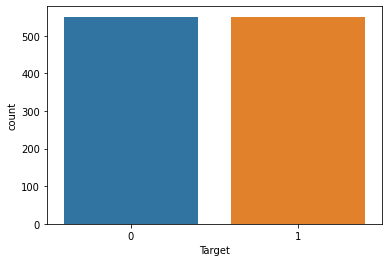

In [18]:
sns.countplot(train['Target'])

### Correlation between features

In [19]:
corr_matrix = abs(train.corr()) 
print(corr_matrix["Target"].sort_values(ascending=False)) 

Target     1.000000
GP         0.410299
FGM        0.356119
PTS        0.354192
MIN        0.354152
REB        0.338257
FTA        0.334718
FTM        0.333098
OREB       0.329306
FGA        0.327988
DREB       0.323428
TOV        0.314013
STL        0.268398
FG%        0.252236
BLK        0.227312
AST        0.213621
FT%        0.088597
3P Made    0.037159
3PA        0.018759
3P%        0.001285
Name: Target, dtype: float64


### Now Model Building

In [23]:
X = train.drop(['Target'],axis=1)
y = train['Target']

In [24]:
X.shape,y.shape,test.shape

((1101, 19), (1101,), (555, 19))

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y, test_size=0.2, random_state =0)

In [26]:
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfr = RandomForestClassifier(n_estimators = 10000)
rfr.fit(X_train,y_train)
#Predicting the Test set results
y_pred_rfr = rfr.predict(X_test)

accuracy_score(y_test,y_pred_rfr)

In [42]:
preds_test = rfr.predict(test)
download_preds(preds_test, file_name='model.csv') 

In [36]:
from xgboost import XGBClassifier
model = XGBClassifier(silent=False, 
                      scale_pos_weight=1,
                      learning_rate=0.03,  
                      colsample_bytree = 0.3,
                      subsample = 0.6,
                      objective='binary:logistic', 
                      n_estimators=5000, 
                      reg_alpha = 0.3,
                      max_depth=7, 
                      gamma=10)
model.fit(X_train, y_train)

[12:26:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:26:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=10, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.03, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=5000, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0.3, reg_lambda=1, scale_pos_weight=1, silent=False,
              subsample=0.6, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [37]:
y_pred = model.predict_proba(X_test)
y_pred

array([[0.67210096, 0.32789904],
       [0.54782873, 0.45217127],
       [0.35335088, 0.6466491 ],
       [0.8550848 , 0.14491525],
       [0.10996157, 0.89003843],
       [0.82797515, 0.17202486],
       [0.25506783, 0.7449322 ],
       [0.17966002, 0.82034   ],
       [0.24425453, 0.7557455 ],
       [0.42901003, 0.57098997],
       [0.7057061 , 0.2942939 ],
       [0.6441818 , 0.3558182 ],
       [0.50860596, 0.49139407],
       [0.34853953, 0.65146047],
       [0.7893654 , 0.21063462],
       [0.61249465, 0.38750535],
       [0.35026962, 0.6497304 ],
       [0.2750336 , 0.7249664 ],
       [0.3048119 , 0.6951881 ],
       [0.42814493, 0.57185507],
       [0.1123662 , 0.8876338 ],
       [0.21866632, 0.7813337 ],
       [0.69964993, 0.3003501 ],
       [0.10069346, 0.89930654],
       [0.83930445, 0.16069558],
       [0.79542595, 0.20457405],
       [0.07485354, 0.92514646],
       [0.45446348, 0.5455365 ],
       [0.60374784, 0.39625216],
       [0.72431177, 0.27568823],
       [0.

In [38]:
print(model.score(X_test,y_test))

0.7375565610859729


In [39]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred[:,1])

0.8057878340711593

In [40]:
preds_test = model.predict_proba(test)[:,1] 
download_preds(preds_test, file_name='model80.csv')